Búsqueda exhaustiva, Monte Carlo y gradiente descendente
===

* 30:00 min | Última modificación: Mayo 21, 2021 | [YouTube]

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

## Definición del problema

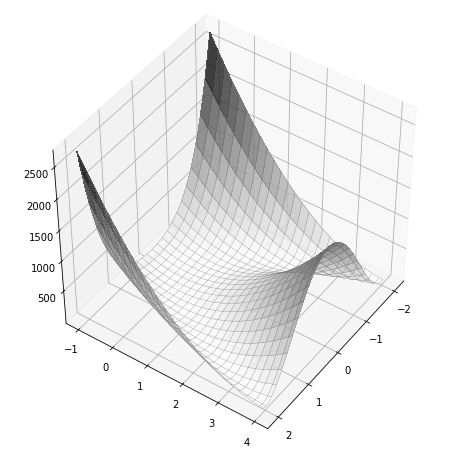

In [2]:
from plots import plot_contour, plot_surface
from testfunctions import rosenbrock as fn

#
# Se desea encontrar el punto de mínima de la función de
# Rosenbrock de dos dimensiones. El punto de mínima es
# f(1, 1) = 0. La región de busqueda es
#
#    -2.048 < x < 2.048
#       -1. < y < 4.
#
plot_surface(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
)

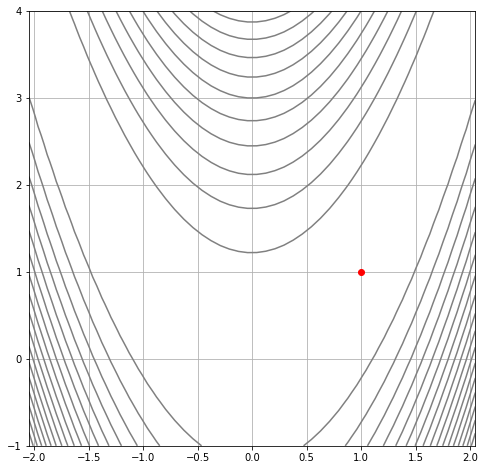

In [3]:
plot_contour(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
    minimum=[(1, 1)],
)

## Búsqueda exhaustiva

In [4]:
#
# Este método consiste en generar una malla de puntos.
# El punto de mínima corresponde al menor valor
# encontrado dentro de la malla.
#

# limites de la región de búsqueda
xb = (-2.048, 2.048)
yb = (-1.0, 4.0)

# número de puntos de la malla
n_points = 50


X = np.linspace(start=xb[0], stop=xb[1], num=n_points)
Y = np.linspace(start=yb[0], stop=yb[1], num=n_points)
X, Y = np.meshgrid(X, Y)
Z = np.array([(x, y, fn(np.array([x, y]))) for x, y in zip(X.ravel(), Y.ravel())])


# búsca el punto de mínima

from operator import itemgetter

Z = sorted(Z, key=itemgetter(2))

#  punto de mínima encontrado y cantidad de puntos evaluados
Z[0], len(Z)

(array([0.96130612, 0.93877551, 0.02300652]), 2500)

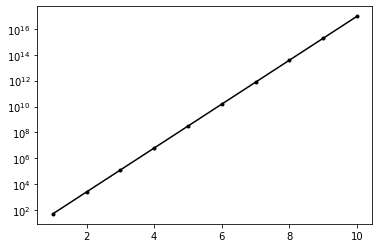

In [5]:
#
# Este método no es viable cuando aumenta la cantidad de
# dimensiones de la función a minimizar.
#
#    puntos_a_evaluar = n_points ** n_dims
#
# El crecimiento es exponencial.
#
n_points = 50
n_dims = np.array(range(1, 11))
fn_evals = np.power(n_points, n_dims)
plt.plot(n_dims, fn_evals, ".-k")
plt.yscale("log")
plt.show()

## Método de Monte Carlo

In [6]:
#
# Consiste en generar un muestreo aleatorio de la región
# factibles y escoger el mejor punto encontrado
#
n_points = 1000

X = np.random.uniform(low=xb[0], high=xb[1], size=n_points)
Y = np.random.uniform(low=yb[0], high=yb[1], size=n_points)
Z = np.array([(x, y, fn(np.array([x, y]))) for x, y in zip(X, Y)])
Z_sorted = sorted(Z, key=itemgetter(2))

#
#  punto de mínima encontrado y cantidad de puntos evaluados
#
Z_sorted[0], len(Z_sorted)

(array([0.86174222, 0.76050595, 0.05117877]), 1000)

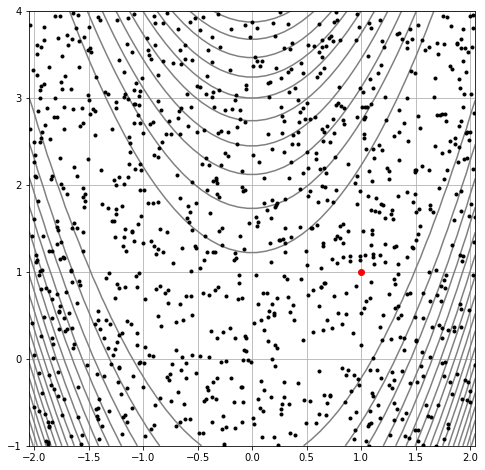

In [7]:
#
# Se grafican los puntos generados aleatoriamente sobre el
# contorno de la función.
#
plot_contour(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
    minimum=[(1, 1)],
)

plt.gca().plot(X, Y, ".k")

Para analizar el comportamiento resulta más interesante considerar la generación de 10 bloques de 100 elementos aleatorios cada uno.

In [8]:
from generators import RandomUniform

#
# Crea una función que genera soluciones uniformemente
# distribuidas en el hipercubo definido por los límites
# low y high
#
monte_carlo = RandomUniform(pop_size=100, low=[-2.048, -1.0], high=[2.048, 4.0])

#
# Genera una muestra aleatoria de 100 soluciones
#
solutions = monte_carlo()

#
# Primeros 5 vectores aleatorios
#
solutions[:5]

[{'x': array([-1.02596604,  1.89743994]), 'fn_x': None},
 {'x': array([ 1.16655919, -0.1425568 ]), 'fn_x': None},
 {'x': array([-0.00935827,  3.3280735 ]), 'fn_x': None},
 {'x': array([-0.07910839,  0.7536126 ]), 'fn_x': None},
 {'x': array([0.726958  , 3.75004738]), 'fn_x': None}]

In [9]:
#
# Evaluación de la función objetivo
#
from fnevaluator import FnEvaluator

#
# Crea una instancia del evaluador que permite evaluar la
# función de rosenbrock para cada elemento de la muestra
# de soluciones
#
evaluator = FnEvaluator(fn)

#
# Evalua la muestra aleatoria
#
solutions = evaluator(solutions)

#
# Primeros 5 vectores aleatorios evaluados
#
solutions[:5]

[{'x': array([-1.02596604,  1.89743994]), 'fn_x': 75.4789248243535},
 {'x': array([ 1.16655919, -0.1425568 ]), 'fn_x': 226.05405041858705},
 {'x': array([-0.00935827,  3.3280735 ]), 'fn_x': 1108.5678353347178},
 {'x': array([-0.07910839,  0.7536126 ]), 'fn_x': 57.018344606464844},
 {'x': array([0.726958  , 3.75004738]), 'fn_x': 1037.9319614758444}]

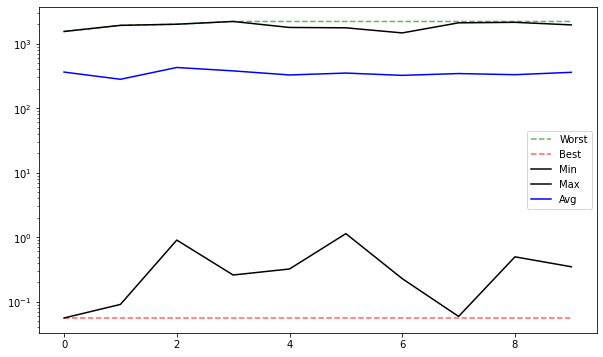

In [10]:
from stats import Statistics

#
# Se instancia un objeto para computar las estadísticas de
# la corrida
#
stats = Statistics()

#
# Se generan 10 poblaciones de 100 elementos cada una
#
for i_run in range(10):
    #
    # Generación de la población
    #
    solutions = monte_carlo()

    #
    # Se evalua la función objetivo
    #
    solutions = evaluator(solutions)

    #
    # Se computan las estadísticas de la población actual
    #
    stats(solutions)

#
# Evolución de las estadísitcas para cada corrida. El
# algoritmo no aprovecha la información obtenida sobre
# la superficie en cada una de las 10 iteraciones. El
# valor promedio de la función objetivo no mejora.
#
stats.plot()

In [11]:
#
# Valor mínimo encontrado en cada una de las 10 corridas
#
stats.min

[0.055849362568002936,
 0.09058718694672105,
 0.900464064911537,
 0.258881158493743,
 0.3208726787308979,
 1.1332182724664563,
 0.22736681348516863,
 0.05902202055937391,
 0.49537792437654615,
 0.3474883966673734]

In [12]:
#
# Mejor valor encontrado en cada una de las 10 corridas.
# Despues de la 3ra corrida no mejora
#
stats.best

[0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936,
 0.055849362568002936]

## Método del Gradiente

In [13]:
#
# El método del gradiente descendente aprovecha la
# información local que entrega el punto actual para
# generar una aproximación mejor al mínimo.
#
from gd import GradientDescendent

#
# Se crea una instancia del optimizador. Cada llamada
# realiza una sola iteración del método del gradiente
# descendente.
#
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

#
# Se crea una instancia del geneador para crear poblaciones
# de una sola solución.
#
monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

#
# Se crea la población de soluciones
#
solutions = monte_carlo()


#
# Se instancia un objeto para computar las estadísticas de
#  la corrida
#
stats = Statistics()

#
# Se realizan NITER iteraciones del algoritmo de gradiente
# descendente
#
NITER = 50

for iter in range(NITER):
    #
    # El único individuo existente tiene indice 0
    #
    solutions = optimizer(solutions)

    #
    # Se computan las estadísticas de la población actual
    #
    stats(solutions)

solutions[0].x, solutions[0].fn_x

(array([1.52044006, 2.31466737]), 0.27171598950694975)

In [14]:
#
# Valor mínimo encontrado en cada iteración
#
stats.min

[285.2808344142781,
 234.9453700167817,
 189.32011698033452,
 149.15359207329277,
 114.86095979004617,
 86.48679183267319,
 63.73028666034457,
 46.022353626153894,
 32.63088982490105,
 22.76728272512218,
 15.673204332788412,
 10.677541913596333,
 7.223530647618883,
 4.872577244189202,
 3.293394247138415,
 2.2441690076406013,
 1.553253086958917,
 1.1015339588871622,
 0.8078583592117797,
 0.6177469726603667,
 0.49505820561132663,
 0.4160411965206584,
 0.3652039261036183,
 0.3325001869762241,
 0.3114443904165112,
 0.29786359372314425,
 0.2890792381592758,
 0.28337463094057774,
 0.27965039258522684,
 0.27720251677480123,
 0.2755798934443407,
 0.27449307238740683,
 0.27375594125756264,
 0.27324848469566604,
 0.27289301675826494,
 0.27263901158912024,
 0.27245341618570573,
 0.2723144570297598,
 0.2722076735984888,
 0.27212337199859055,
 0.27205498518112514,
 0.27199801280977814,
 0.27194933254907844,
 0.2719067500142664,
 0.2718687026232788,
 0.2718340631310087,
 0.2718020080740183,
 0.27177

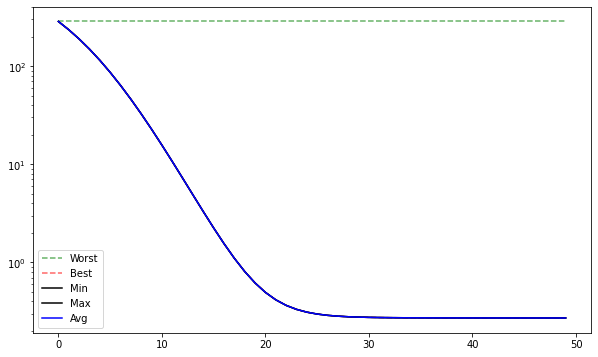

In [15]:
stats.plot()

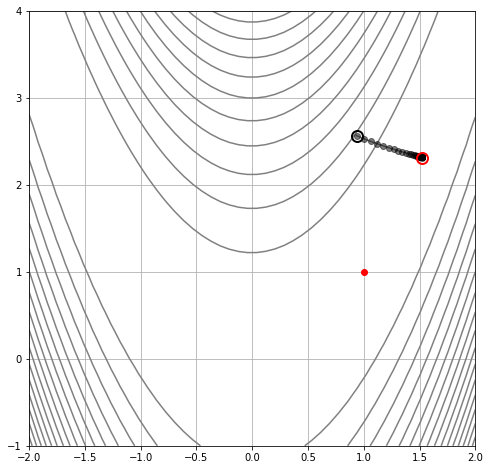

In [16]:
#
# Trayectoria del punto inicial al punto final
#
from plots import plot_trayectory

plot_trayectory(stats, fn, x_bounds=[(-2, 2), (-1, 4)], minimum=[(1, 1)])

## Método del gradiente descendente con reinicio

In [17]:
#
# El resultado del método es dependiente del punto de
# arranque por lo que se suele reiniciar la optimización
# usando puntos de arranque aleatorios
#

# Crea una instancia del optimizador
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

# Estadísticas de las corridas
stats = Statistics()

# Generador del punto aleatorio
monte_carlo = RandomUniform(
    pop_size=1,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

# Número de reinicios
NRESTARTS = 10


# Número de iteraciones para cada reinicio
NITER = 50

for cycle in range(NRESTARTS):

    #  reinicio
    solutions = monte_carlo()

    for iter in range(NITER):

        # El único individuo existente tiene indice 0
        solutions = optimizer(solutions)

        # Se computan las estadísticas de la población actual
        stats(solutions)


stats.x_opt, stats.fn_opt

(array([-0.33816605,  3.30242796]), 1018.1707899161064)

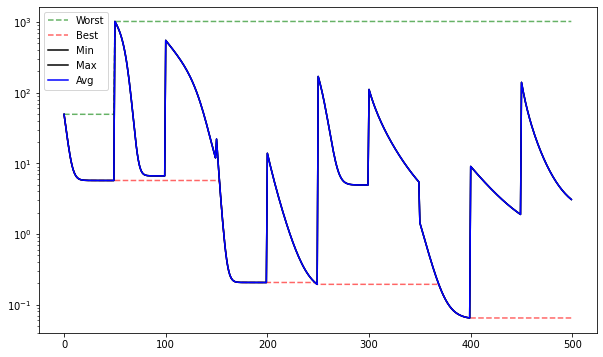

In [18]:
stats.plot()

## Búsqueda de un buen punto de inicio

In [19]:
#
# En superficies dificiles, malos puntos de inicio suelen
# llevar a malas soluciones finales, por lo que se puede
# usar una técnica como Monte Carlo para encontrar un buen
# punto de arranque
#

# Crea una instancia del optimizador
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

# Estadísticas de las corridas
stats = Statistics()

# Cantidad de soluciones simultánteas
POPSIZE = 10

# Generador del punto aleatorio
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

# Número de iteraciones
NITER = 50

# Genera una población inicial de soluciones
solutions = optimizer(solutions)
stats(solutions)

#
# Crea una instancia del seleccionador
#
from selection import BestK

best_k = BestK(K=1)
solutions = best_k(solutions)

for iter in range(NITER):
    solutions = optimizer(solutions)
    stats(solutions)

stats.x_opt, stats.fn_opt

(array([-0.43433242,  0.09166159]), 2.9978808676179365)

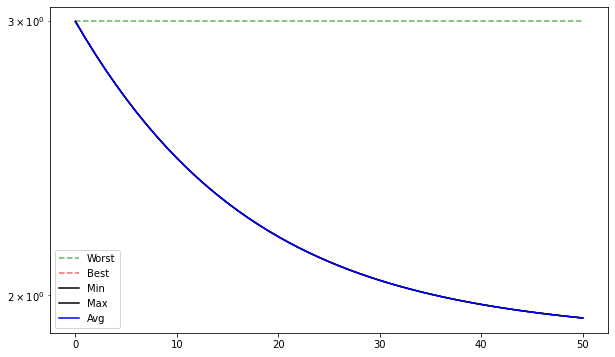

In [20]:
stats.plot()

## Genetización del método del gradiente descendente

In [21]:
#
# Se refiere al hecho de tener una población de soluciones
# y en cada ciclo, cada una realiza un ciclo del gradiente
#  descendente (o cualquier otra técnica de búsqueda local)
#

# Crea una instancia del optimizador
optimizer = GradientDescendent(fn=fn, learning_rate=0.0001)

# Estadísticas de las corridas
stats = Statistics()

# Cantidad de soluciones simultánteas
POPSIZE = 10

# Generador del punto aleatorio
monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
)

# Número de iteraciones
NITER = 50

#  Generación de las soluciones iniciales
solutions = monte_carlo()

for iter in range(NITER):

    solutions = optimizer(solutions)
    stats(solutions)


stats.x_opt, stats.fn_opt

(array([-0.68061683,  0.82033768]), 15.576400792997742)

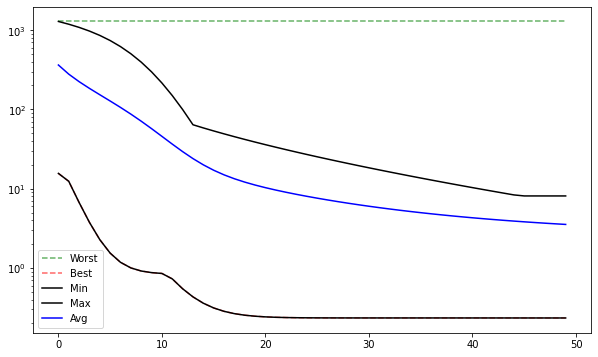

In [22]:
stats.plot()

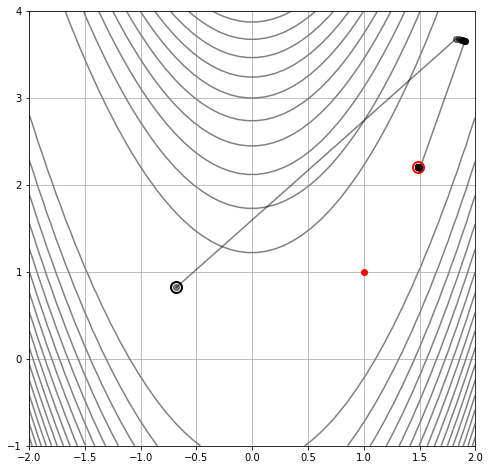

In [23]:
plot_trayectory(stats, fn, x_bounds=[(-2, 2), (-1, 4)], minimum=[(1, 1)])